| Aluno                | Curso                           | Matrícula   |
|----------------------|---------------------------------|-------------|
| Diogo Dias da Silva | Engenharia Química - UFPB | 20220028795 |

---

"Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem."

Fonte: [INEP - Microdados do Enem](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)


## Motivação

O objetivo do trabalho foi analisar os microdados do Enem 2022 e observar algumas lacunas que o nosso sistema educacional precisa sanar para que mais estudantes, principalmente os que vivem em vulnerabilidade social consigam uma vaga na universidade. E também explorar o comportamento das notas dos estudantes nas disciplinas de Ciências Humanas e Matemática.

## Dicionário dos Dados

Acesse esse Link: [Dicionário dos Dados](https://docs.google.com/spreadsheets/d/1cNLeg0md4eovqzevYODtRRznmQQYGGEI/edit#gid=1841629669)

##Importação das Bibliotecas Utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns



## Carregando os Dados

In [2]:
dados_enem2022 = pd.read_csv("/content/drive/MyDrive/Datasets/Enem 2022/DADOS/MICRODADOS_ENEM_2022.csv", sep=";", encoding='ISO-8859-1')

In [3]:
#Verificando se todas as colunas foram de fato carregadas
dados_enem2022.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [4]:
#Carregando uma parte dos dados
dados_enem2022.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [5]:
dados_enem2022.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3476100,210056389903,2022,3,M,1,1,1,2,0,2,...,B,A,B,B,B,A,E,A,A,B
3476101,210057205644,2022,14,F,2,1,1,2,0,2,...,A,A,A,B,A,A,C,A,B,B
3476102,210056699189,2022,2,M,1,1,1,2,0,2,...,B,A,B,C,B,A,E,A,B,B
3476103,210056983033,2022,3,M,1,3,1,2,0,3,...,B,A,B,D,A,A,E,A,B,B
3476104,210056307777,2022,2,F,2,3,1,2,0,2,...,A,A,A,B,A,A,C,A,C,B


## Limpeza dos Dados

### Filtro

In [6]:
#Selecionando colunas necessárias para minha análise
filtro = ["Q006", "TP_DEPENDENCIA_ADM_ESC","TP_FAIXA_ETARIA", "TP_SEXO", "NU_NOTA_CH", "NU_NOTA_MT", "TP_COR_RACA"]

#Armazenando os itens do filtro em um novo df
microdados_filtrados = dados_enem2022.filter(items = filtro)

In [7]:
#Quantas observações temos no DF
microdados_filtrados.shape[0]

3476105

In [8]:
#Observando primeiras linhas
microdados_filtrados.head()

,Q006,TP_DEPENDENCIA_ADM_ESC,TP_FAIXA_ETARIA,TP_SEXO,NU_NOTA_CH,NU_NOTA_MT,TP_COR_RACA
0,B,NaN,14,M,NaN,NaN,2
1,Q,NaN,14,M,NaN,NaN,1
2,B,NaN,5,F,546.0,565.3,2
3,A,NaN,6,M,388.6,416.0,3
4,B,NaN,4,M,NaN,NaN,3


In [9]:
#Observando últimas linhas
microdados_filtrados.tail()

,Q006,TP_DEPENDENCIA_ADM_ESC,TP_FAIXA_ETARIA,TP_SEXO,NU_NOTA_CH,NU_NOTA_MT,TP_COR_RACA
3476100,F,NaN,3,M,NaN,NaN,1
3476101,B,2.0,14,F,NaN,NaN,1
3476102,G,2.0,2,M,627.0,637.1,1
3476103,E,4.0,3,M,NaN,NaN,3
3476104,B,2.0,2,F,NaN,NaN,3


### Limpando dados faltantes

In [10]:
#Descobrindo informações dos meus dados
microdados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Q006                    object 
 1   TP_DEPENDENCIA_ADM_ESC  float64
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   NU_NOTA_CH              float64
 5   NU_NOTA_MT              float64
 6   TP_COR_RACA             int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 185.6+ MB


In [11]:
#Aqui observamos que há apenas 951,944 registros do tipo de escola do estudante
#(Dados totais - Números de Registros de tipo de Escola)
num_nulos = microdados_filtrados.isnull().sum()
num_nulos

Q006                            0
TP_DEPENDENCIA_ADM_ESC    2524161
TP_FAIXA_ETARIA                 0
TP_SEXO                         0
NU_NOTA_CH                 982663
NU_NOTA_MT                1120710
TP_COR_RACA                     0
dtype: int64

In [12]:
#Nessa minha análise em específico, irei remover todos os registros nulos do df.
microdados_limpos = microdados_filtrados.dropna()
microdados_limpos.shape[0]

692915

Podemos perceber que agora temos um conjunto de dados bem menor que anteriormente, contávamos com um total de 3.476.105 registros, agora apenas com 692.915

In [13]:
microdados_limpos.head()

,Q006,TP_DEPENDENCIA_ADM_ESC,TP_FAIXA_ETARIA,TP_SEXO,NU_NOTA_CH,NU_NOTA_MT,TP_COR_RACA
40,B,2.0,5,F,420.0,430.4,3
55,E,4.0,3,F,684.9,905.5,1
57,F,2.0,2,M,579.2,551.9,3
59,B,2.0,3,F,485.9,433.6,3
67,D,2.0,3,M,485.0,438.0,1


In [14]:
microdados_limpos.tail()

,Q006,TP_DEPENDENCIA_ADM_ESC,TP_FAIXA_ETARIA,TP_SEXO,NU_NOTA_CH,NU_NOTA_MT,TP_COR_RACA
3476074,B,2.0,4,M,443.1,449.9,3
3476086,F,2.0,2,M,557.5,492.0,1
3476093,F,2.0,3,F,539.8,544.6,1
3476098,B,2.0,2,M,495.6,597.4,3
3476102,G,2.0,2,M,627.0,637.1,1


### Padronizando o DF

In [15]:
#Padronizando a variável de acordo com as outras
microdados_limpos["Q006"] = microdados_limpos["Q006"].map({
    "A":1,
    "B":2,
    "C":3,
    "D":4,
    "E":5,
    "F":6,
    "G":7,
    "H":8,
    "I":9,
    "J":10,
    "K":11,
    "L":12,
    "M":13,
    "N":14,
    "O":15,
    "P":16,
    "Q":17
})

<ipython-input-15-c6f3cebc736b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microdados_limpos["Q006"] = microdados_limpos["Q006"].map({


In [16]:
microdados_limpos["TP_SEXO"] = microdados_limpos["TP_SEXO"].map({
    "F":1,
    "M":2
})

<ipython-input-16-a19da7c62e65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microdados_limpos["TP_SEXO"] = microdados_limpos["TP_SEXO"].map({


Agrupando dados dos Estados em Regiões: 1 Nordeste, 2 Sudeste, 3 Sul, 4 Centro-Oeste, 5 Norte

In [17]:
microdados_limpos.head()

,Q006,TP_DEPENDENCIA_ADM_ESC,TP_FAIXA_ETARIA,TP_SEXO,NU_NOTA_CH,NU_NOTA_MT,TP_COR_RACA
40,2,2.0,5,1,420.0,430.4,3
55,5,4.0,3,1,684.9,905.5,1
57,6,2.0,2,2,579.2,551.9,3
59,2,2.0,3,1,485.9,433.6,3
67,4,2.0,3,2,485.0,438.0,1


In [18]:
microdados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692915 entries, 40 to 3476102
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Q006                    692915 non-null  int64  
 1   TP_DEPENDENCIA_ADM_ESC  692915 non-null  float64
 2   TP_FAIXA_ETARIA         692915 non-null  int64  
 3   TP_SEXO                 692915 non-null  int64  
 4   NU_NOTA_CH              692915 non-null  float64
 5   NU_NOTA_MT              692915 non-null  float64
 6   TP_COR_RACA             692915 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 42.3 MB


## Calculos

In [19]:
microdados_limpos.head()

,Q006,TP_DEPENDENCIA_ADM_ESC,TP_FAIXA_ETARIA,TP_SEXO,NU_NOTA_CH,NU_NOTA_MT,TP_COR_RACA
40,2,2.0,5,1,420.0,430.4,3
55,5,4.0,3,1,684.9,905.5,1
57,6,2.0,2,2,579.2,551.9,3
59,2,2.0,3,1,485.9,433.6,3
67,4,2.0,3,2,485.0,438.0,1


Plotando histogramas para avaliar a distribuição dos meus dados e já podemos observar alguns comportamentos.

- A maioria dos matriculados para o exame possui de 17 a 18 anos. (Recém saídos do ensino médio)
- Mais pessoas do sexo masculino se matriculou para participar do exame.
- Mais alunos de escolas Estaduais realizaram a prova, em relação aos de institutos federais e instituições privadas.
- O Núcleo familiar da maior parte dos estudantes matriculados possuem renda mensal de 1.212,00 a 2.424,00 reais

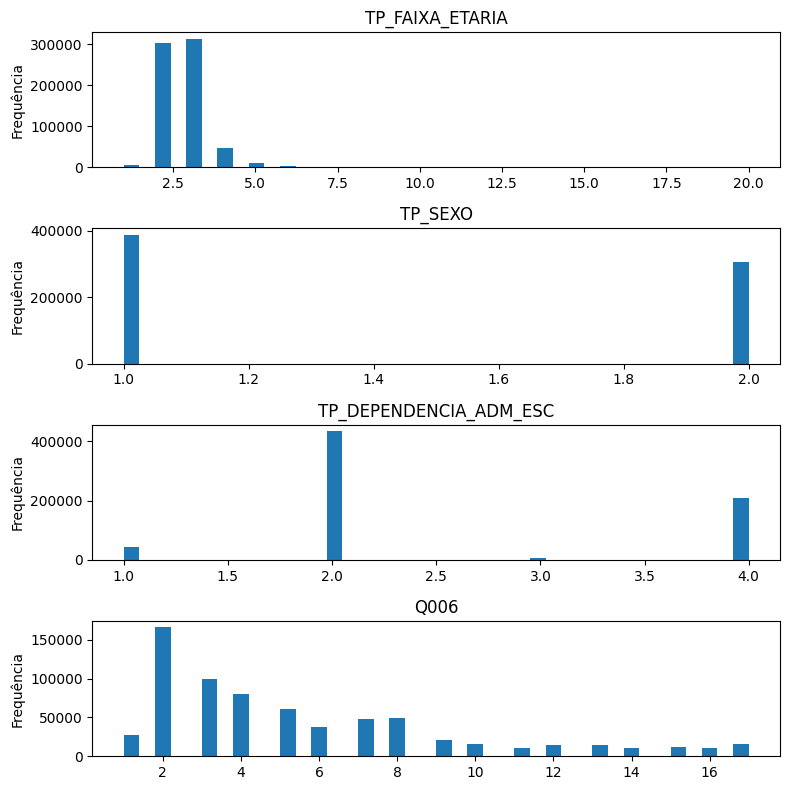

In [45]:
#Obs: plotar legenda para cada gráfico depois
distribuicao = ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_DEPENDENCIA_ADM_ESC", "Q006"]

dados_dist = microdados_limpos.filter(items = distribuicao)

fig, axs = plt.subplots(nrows=len(distribuicao), figsize=(8, 8))

#Plotando um histograma para cada variável
for i, variavel in enumerate(distribuicao):
    axs[i].hist(microdados_limpos[variavel], bins=40)
    axs[i].set_title(variavel)
    axs[i].set_ylabel('Frequência')

# Ajustar o layout para que eles não se sobreponham
plt.tight_layout()


As medidas de centralidade indicam que as notas de ciências humanas tendem a ser mais homogêneas que as notas de Matemática, a gente pode observar esse comportamento comparando a diferença entre a média e mediana que em Ciências Humanas é de 3.03 e em Matemática é 8.7

Podemos observar as notas mínimas e máximas nas provas também, onde a mínima foi zero e a máxima foi 839.2 em Ciências Humanas e 985.7 em Matemática

In [21]:
#Observando as medidas de centralidade dos dados
observar = ["NU_NOTA_CH", "NU_NOTA_MT"]

descricao_notas = microdados_limpos.filter(observar)
descricao_notas.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CH,692915.0,529.371881,78.795890,0.0,480.4,532.9,583.4,839.2
NU_NOTA_MT,692915.0,548.408540,116.083776,0.0,454.3,539.7,629.9,985.7


## K-means: Observando perfis de alunos em Ciências da Natureza e Matemática

<Axes: xlabel='NU_NOTA_CH', ylabel='NU_NOTA_MT'>

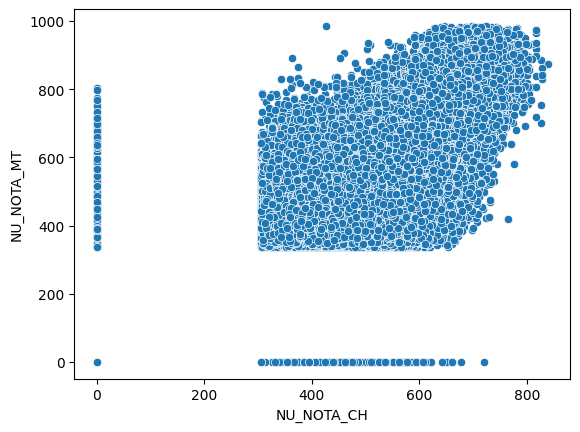

In [29]:
sns.scatterplot(data=microdados_limpos, x= "NU_NOTA_CH", y ="NU_NOTA_MT" )

In [30]:
dados_group = microdados_limpos[["NU_NOTA_CH","NU_NOTA_MT"]]

In [31]:
kmeans = KMeans(n_clusters = 2)

In [32]:
kmeans.fit(dados_group)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [33]:
kmeans.fit(dados_group)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [34]:
kmeans.labels_

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

<Axes: xlabel='NU_NOTA_CH', ylabel='NU_NOTA_MT'>

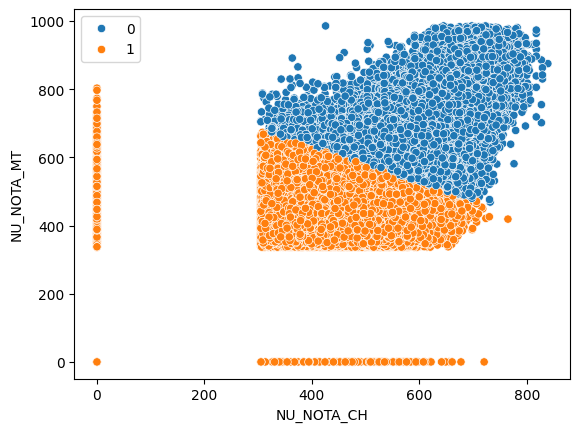

In [35]:
sns.scatterplot(data=dados_group, x="NU_NOTA_CH", y = "NU_NOTA_MT", hue= kmeans.labels_)

Podemos observar que grande parte do pessoal que vai bem em matemátoca também vai bem em Ciências Humanas, o mesmo não acontece com o inverso disso. Muitos alunos negligenciam o estudo da matemática por preconceito ou por esbarrarem com professores que acabam trazendo experiências traumáticas. Matemática não é só resolver contas, a matemática treina raciocínio lógico e precisa sim ser olhada com mais carinho e não como um bicho de 7 cabeças.

## 1. Comportamento das notas em Ciências Humanas e Matemática

Text(0, 0.5, 'Áreas de Conhecimento')

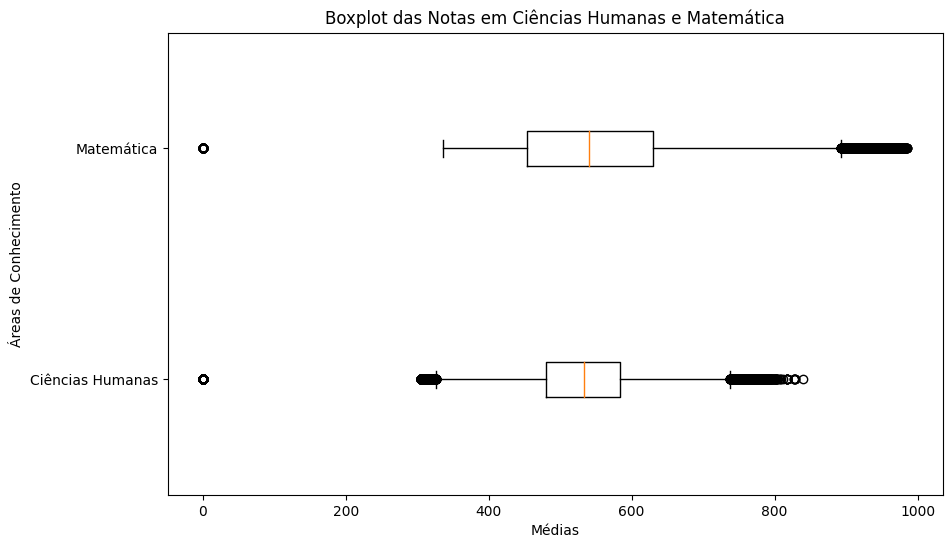

In [22]:
nomes_colunas = ["Ciências Humanas", "Matemática"]

plt.figure(figsize=(10, 6))
plt.title("Boxplot das Notas em Ciências Humanas e Matemática")
plt.boxplot(x=descricao_notas, labels = nomes_colunas, vert=False)
plt.xlabel("Médias")
plt.ylabel("Áreas de Conhecimento")




Há alguns pontos a se observar: a distribuição dos dados está assimétrica positiva pra matemática (a calda do boxplot está mais avantajada no lado positivo), ou seja, alguns indivíduos estão com notas MUITO maiores em matemática em relação a média.

Já em ciências humanas os dados são bem mais simétricos, a variação de notas não é muito grande e a média e mediana são bem próximas.

In [23]:
Q1 = descricao_notas.quantile(0.25)
Q1

NU_NOTA_CH    480.4
NU_NOTA_MT    454.3
Name: 0.25, dtype: float64

In [24]:
Q2 = descricao_notas.quantile(0.50)
Q2

NU_NOTA_CH    532.9
NU_NOTA_MT    539.7
Name: 0.5, dtype: float64

In [25]:
Q3 = descricao_notas.quantile(0.75)
Q3

NU_NOTA_CH    583.4
NU_NOTA_MT    629.9
Name: 0.75, dtype: float64

In [26]:
#Temos IQRs grandes por conta da presença de muitos outliers
IQR = Q3 - Q1
IQR

NU_NOTA_CH    103.0
NU_NOTA_MT    175.6
dtype: float64

In [27]:
#Calculando os limites inferiores e superiores para saber quem são meus outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [28]:
outliers = (descricao_notas < limite_inferior) | (descricao_notas > limite_superior)

dados_outliers = descricao_notas[outliers.any(axis=1)]
dados_outliers

,NU_NOTA_CH,NU_NOTA_MT
55,684.9,905.5
635,325.3,436.0
1189,773.7,901.3
2502,305.2,392.4
4589,324.5,574.4
...,...,...
3471603,0.0,566.5
3472490,0.0,714.9
3474581,0.0,593.9
3475169,312.8,406.3


## 2. Relação de Renda e Desempenho do Estudante

###Visualização

Os dados estão distribuidos de forma muito confusa, não dá para termos ideia do comportamento. Então, vou aplicar uma técnica de agregação, que consiste, nesse caso, em tirar a média geral das notas de Ciências Humanas e Matemática[texto do link](https://) para cada faixa de renda.

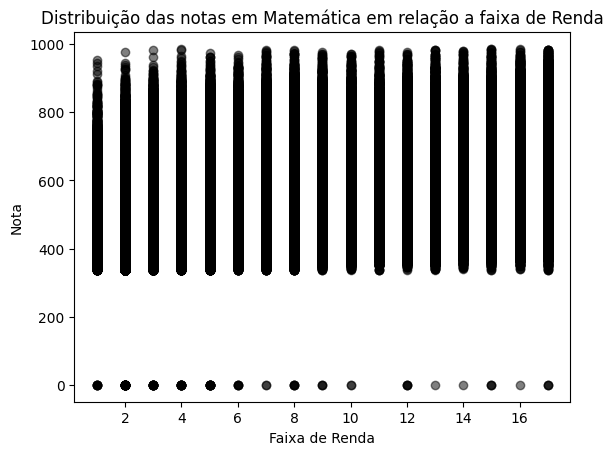

In [36]:
x = microdados_limpos["Q006"]
y = microdados_limpos["NU_NOTA_MT"]

plt.title("Distribuição das notas em Matemática em relação a faixa de Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Nota")
plt.scatter(x, y, color="black", alpha = 0.5)

In [37]:
#Aplicando técnica de agregação

agregacaomt = microdados_limpos.groupby('Q006').agg({"NU_NOTA_MT": "mean"})

#antes ele tava tratando minha coluna Q006 como índice e isso atrapalhou a etapa de plotagem
#o matplot não tava reconhecendo o Q006 e retornando erro
agregacaomt.reset_index(inplace=True)

Text(0, 0.5, 'Nota')

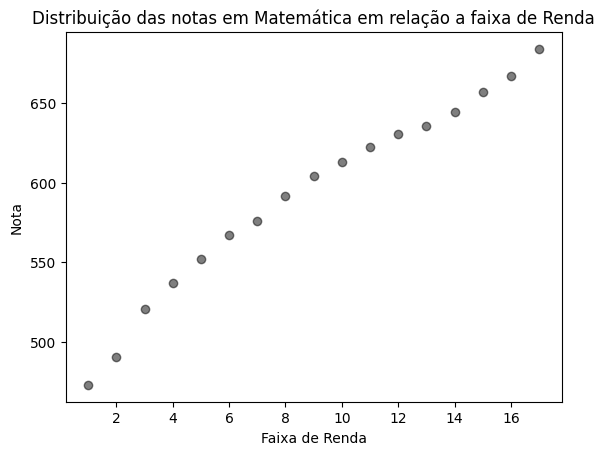

In [38]:
plt.scatter(x= agregacaomt["Q006"], y=agregacaomt["NU_NOTA_MT"], color="black", alpha = 0.5)
plt.title("Distribuição das notas em Matemática em relação a faixa de Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Nota")

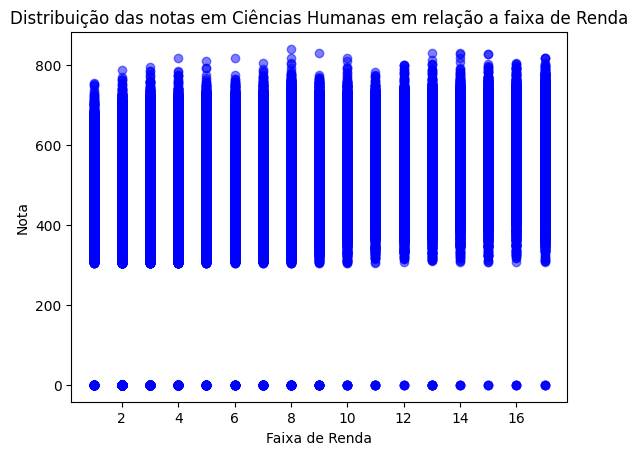

In [39]:
x = microdados_limpos["Q006"]
y = microdados_limpos["NU_NOTA_CH"]

plt.title("Distribuição das notas em Ciências Humanas em relação a faixa de Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Nota")
plt.scatter(x, y, color="Blue", alpha = 0.5)

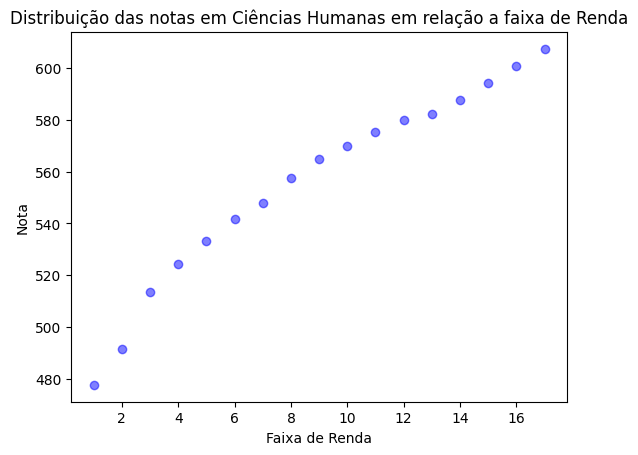

In [40]:
#Aplicando a técnica de agregação novamente

agregacaoch = microdados_limpos.groupby("Q006").agg({"NU_NOTA_CH": "mean"})

agregacaoch.reset_index(inplace=True)

plt.title("Distribuição das notas em Ciências Humanas em relação a faixa de Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Nota")
plt.scatter(x = agregacaoch["Q006"], y = agregacaoch["NU_NOTA_CH"],color="Blue", alpha = 0.5)

É possível observar uma relação linear entre os dados. Portanto, a resposta para meu primeiro questionamento é, sim: a faixa de renda impacta SIM no desempenho dos estudantes, e isso pode ser atribuído a diversos fatores.
Um deles é que os estudantes de baixa renda, em comparação aos com melhores condições financeiras, frequentemente enfrentam não apenas um ensino precário, mas também a necessidade de trabalhar para contribuir com o sustento da família. Esses jovens lidam diariamente com diversas preocupações e responsabilidades, o que muitas vezes os impede de dedicar-se inteiramente aos estudos para o vestibular.

## 3. Relação entre Tipo de Ensino e Desempenho

### Visualização

Agora, irei observar se o tipo de ensino (Público e Privados) impactam de forma geral o desempenho dos alunos.

Nesse gráfico podemos mais uma vez observar o número de estudantes inscritos no ENEM em cada modalidade de ensino.

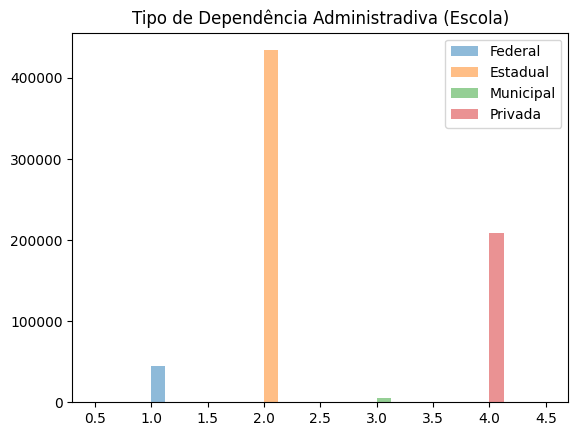

In [41]:
tipoescola = ["TP_DEPENDENCIA_ADM_ESC"]


aluno_tipoescola = microdados_limpos.filter(items=tipoescola)

# Separando os dados por tipo de dependência administrativa da escola
federal = aluno_tipoescola[aluno_tipoescola["TP_DEPENDENCIA_ADM_ESC"] == 1]
estadual = aluno_tipoescola[aluno_tipoescola["TP_DEPENDENCIA_ADM_ESC"] == 2]
municipal = aluno_tipoescola[aluno_tipoescola["TP_DEPENDENCIA_ADM_ESC"] == 3]
privada = aluno_tipoescola[aluno_tipoescola["TP_DEPENDENCIA_ADM_ESC"] == 4]

plt.title("Tipo de Dependência Administradiva (Escola)")
plt.hist(federal["TP_DEPENDENCIA_ADM_ESC"], bins=8, alpha=0.5, label="Federal")
plt.hist(estadual["TP_DEPENDENCIA_ADM_ESC"], bins=8, alpha=0.5, label="Estadual")
plt.hist(municipal["TP_DEPENDENCIA_ADM_ESC"], bins=8, alpha=0.5, label="Municipal")
plt.hist(privada["TP_DEPENDENCIA_ADM_ESC"], bins=8, alpha=0.5, label="Privada")
plt.legend()

Aqui a gente pode reparar que no geral, alunos de instituições federais e de escolas privadas (1 e 4 respectivamente), possuem uma maior tendência em ter maiores notas. Já alunos de rede municipal e estadua, as menores.

Isso fica ainda mais claro quando paramos para observar a discrepância nos ensinos das redes Estaduais e Municipais em relação a outros tipos de ensino. Geralmente, instituições federais fazem avaliações para filtrar os alunos que irão entrar, o que impacta relativamente nessa análise social, tendo em vista que o perfil de um aluno de instituto federal é diferente de alunos de escolas Estaduais, onde diversos fatores sociais e econômicos devem ser analisados.

Text(0, 0.5, 'Nota')

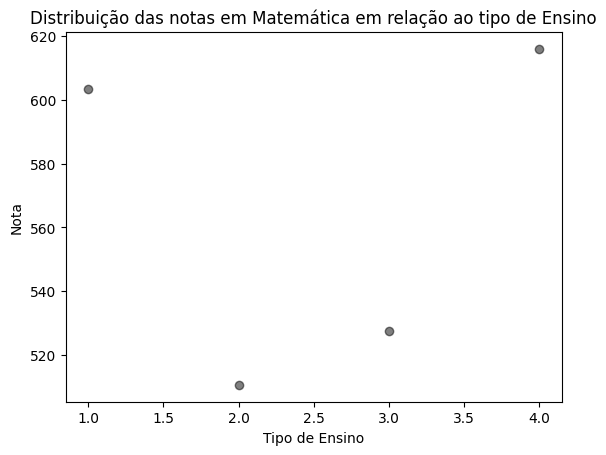

In [42]:
#vamos analizar se o tipo de ensino do estudante impacta em seu desempenho

agregacaoes = microdados_limpos.groupby("TP_DEPENDENCIA_ADM_ESC").agg({"NU_NOTA_MT":"mean"})

agregacaoes.reset_index(inplace=True)

plt.scatter(x=agregacaoes["TP_DEPENDENCIA_ADM_ESC"], y=agregacaoes["NU_NOTA_MT"], color="black", alpha = 0.5)
plt.title("Distribuição das notas em Matemática em relação ao tipo de Ensino")
plt.xlabel("Tipo de Ensino")
plt.ylabel("Nota")

Text(0, 0.5, 'Nota')

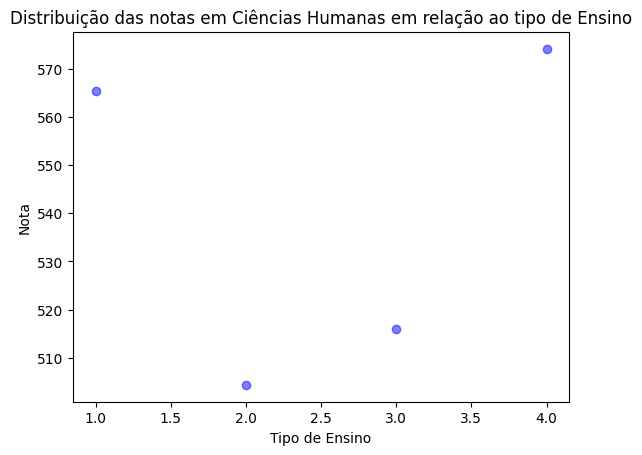

In [43]:
agregacaoes = microdados_limpos.groupby("TP_DEPENDENCIA_ADM_ESC").agg({"NU_NOTA_CH":"mean"})

agregacaoes.reset_index(inplace=True)

plt.scatter(x=agregacaoes["TP_DEPENDENCIA_ADM_ESC"], y=agregacaoes["NU_NOTA_CH"], color="Blue", alpha= 0.5)
plt.title("Distribuição das notas em Ciências Humanas em relação ao tipo de Ensino")
plt.xlabel("Tipo de Ensino")
plt.ylabel("Nota")

Nesse outro podemos claramente observar a frequência com que cada nota aparece em cada tipo de ensino. Podemos observar que mesmo aparecendo menos, o maior pico de notas do ensino Federal está acima da média, já os menores, estão abaixo da média e em notas extremamentes altas. Já nas Escolas Estaduais, os maiores picos estão concentrados em notas abaixo da média e ele tende a cair quando as notas aumentam. Por outro lado, as instituições privadas registram os maiores picos em notas acima da média e ele tende a cair apenas em notas extremamente altas.

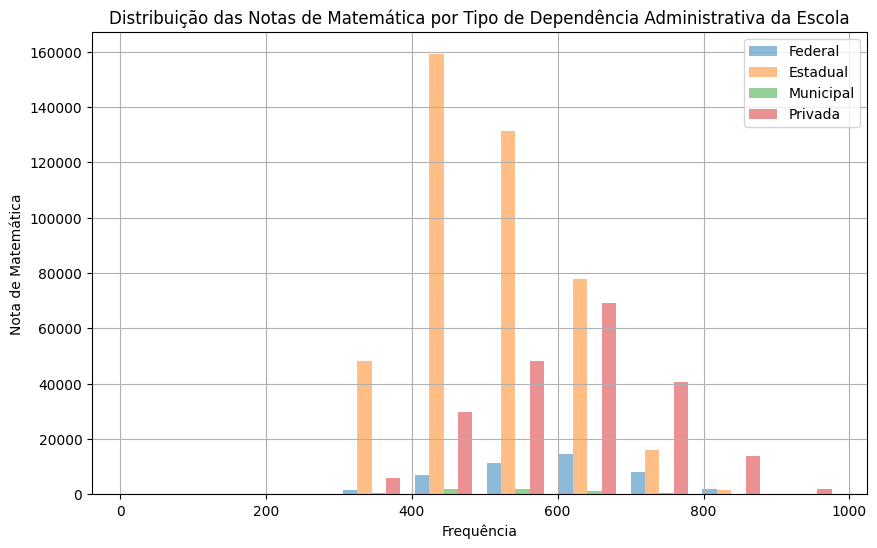

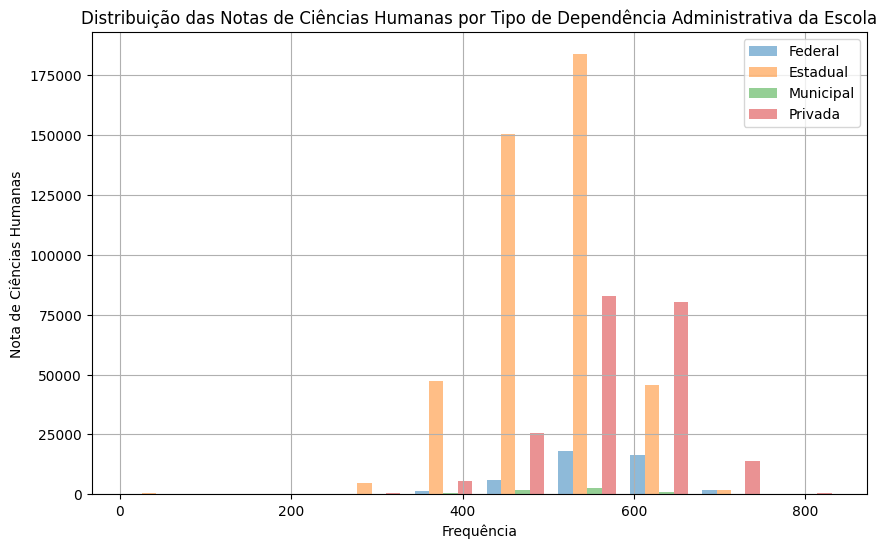

In [44]:
desempenho = ["TP_DEPENDENCIA_ADM_ESC", "NU_NOTA_MT", "NU_NOTA_CH"]

obs_desempenho = microdados_limpos[desempenho]

# Filtrando apenas as colunas desejadas
obs_desempenho = microdados_limpos[desempenho]

# Plotando o histograma para cada tipo de dependência administrativa da escola
plt.figure(figsize=(10, 6))

federal = obs_desempenho[obs_desempenho["TP_DEPENDENCIA_ADM_ESC"] == 1]
estadual = obs_desempenho[obs_desempenho["TP_DEPENDENCIA_ADM_ESC"] == 2]
municipal = obs_desempenho[obs_desempenho["TP_DEPENDENCIA_ADM_ESC"] == 3]
privada = obs_desempenho[obs_desempenho["TP_DEPENDENCIA_ADM_ESC"] == 4]

plt.hist([federal['NU_NOTA_MT'], estadual['NU_NOTA_MT'], municipal['NU_NOTA_MT'], privada['NU_NOTA_MT']], bins=10, alpha=0.5, label=['Federal', 'Estadual', 'Municipal', 'Privada'], orientation='vertical')

plt.title('Distribuição das Notas de Matemática por Tipo de Dependência Administrativa da Escola')
plt.xlabel('Frequência')
plt.ylabel('Nota de Matemática')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.hist([federal['NU_NOTA_CH'], estadual['NU_NOTA_CH'], municipal['NU_NOTA_CH'], privada['NU_NOTA_CH']], bins=10, alpha=0.5, label=['Federal', 'Estadual', 'Municipal', 'Privada'], orientation='vertical')

plt.title('Distribuição das Notas de Ciências Humanas por Tipo de Dependência Administrativa da Escola')
plt.xlabel('Frequência')
plt.ylabel('Nota de Ciências Humanas')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Conclusão

Pudemos observar que a renda do estudante tem o poder de impactar positivamente ou negativamente o desempenho do mesmo. É extremamente importante trazermos o debate de políticas públicas eficazes para que mais jovens em vulnerabilidade social consigam mudar de vida através do estudo. Afinal “A educação é a arma mais poderosa que você pode usar para mudar o mundo” – Nelson Mandela.

Nossos dados também mostra que devemos ajudar os nossos estudantes a enxergar a matemática com outros olhos. Alunos que são bons em matemática tendem a ser bom nas outras disciplinas também e isso se dá pelo treinamento lógico que a matemática desenvolve. Olhar com carinho para essa área do conhecimento é crucial. Ter professores dispostos a mostrar a beleza da matemática aos alunos também.



Algumas melhorias que podem ser implementadas ao projeto:

Fazer uma análise mais robusta no quesido do desempenho na prova em relação a raça do participante, infelizmente ainda não está aplicada ao trabalho por motivos de demandas acadêmicas que impediram as implementações. Com essa análise, poderemos observar se as políticas públicas no que tange as cotas estão sendo eficazes ao trazer o interesse em mais jovens pretos, pardos e indígenas para o ambiente acadêmico.

Outra melhoria que pode ser aplicadas são tecnicas robustas de previsão de variáveis.

Espero que tenham gostado. Sugestões? Contate: diasdiogo429@gmail.com